In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Importing all the necessary libraries

In [0]:
# import packages
# import general necessary packages
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, cv2
# import general necessary packages (CNN_regression)
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from numpy.random import seed
from numpy import savez_compressed
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import seaborn as sns # for plotting
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [0]:
pip install geopandas

In [0]:
from shapely.geometry import Point, Polygon

## Data Description


1. Accident_Index
2. Location_Easting_OSGR
3. Location_Northing_OSGR - Unique ID
4. Longitude - Local British coordinates x-value
5. Latitude - Local British coordinates y-value
6. Police_Force
7. Accident_Severity
8. Number_of_Vehicles
9. Number_of_Casualties1 = Fatal, 2 = Serious, 3 = Slight
10. Date
11. Day_of_Week
12. TimeIn dd/mm/yyyy format.
13. Local_Authority_(District) - Numeric: 1 for Sunday, 2 for Monday, and so on.
14. Local_Authority_(Highway) - Time the accident was reported, in UTC+0.
15. 1st_Road_Class
16. 1st_Road_Number
17. Road_Type - This field is only used for junctions.
18. Speed_limit - This field is only used for junctions.
19. Junction_Detail - Some options are Roundabout, One Way, Dual 20. Carriageway, Single Carriageway, Slip Road, Unknown.
20. Junction_Control
21. 2nd_Road_Class - Some options are Crossroads, Roundabouts, Private Roads, Not a Junction.
22. 2nd_Road_Number - A person, a type of sign, automated, etc.
Pedestrian_Crossing-Human_ControlThis field is only used for junctions.
23. Pedestrian_Crossing-Physical_Facilities - This field is only used for junctions.
24. Light_Conditions - Was there a human controller and what type?
Weather_ConditionsWas it a zebra crossing, or bridge, or another type?
25. Road_Surface_Conditions - Day, night, street lights or not.
Special_Conditions_at_SiteWind, rain, snow, fog.
26. Carriageway_Hazards - Wet, snow, ice, flood.
27. Urban_or_Rural_AreaWas anything broken or defective, e.g. an obscured sign?
28. Did_Police_Officer_Attend_Scene_of_Accident - Was something in the way, e.g. a pedestrian, another accident, something in the road?
29. LSOA_of_Accident_Location
30. Year

### Loading the Dataset

In [0]:
# Data is present in three different csv's each representing different year durations

data1=pd.read_csv("/content/drive/My Drive/Deep Learning/UK_accidents/accidents_2005_to_2007.csv")
data2=pd.read_csv("/content/drive/My Drive/Deep Learning/UK_accidents/accidents_2009_to_2011.csv")
data3=pd.read_csv("/content/drive/My Drive/Deep Learning/UK_accidents/accidents_2012_to_2014.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Concatenating the Data

In [0]:
# Concatenating the data
data = pd.concat([data1,data2,data3])

Data Exploration -PreProcessing

In [0]:
## Here we are re-coding Accident Severity 1 and 2 as 0 and 3 as 1 it in to a binary classification 
def make_binary(row):
  if str(row['Accident_Severity']) == '1' or str(row['Accident_Severity']) == '2':
    value = 0
  else:
    value = 1
  return value

In [0]:
data['new_acc_sev'] = data.apply(make_binary, axis=1)

In [0]:
data.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,new_acc_sev
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005,0
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005,1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005,1
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005,1
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005,1


In [0]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [0]:
# check missing values
data.isna().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

Feature Engineering

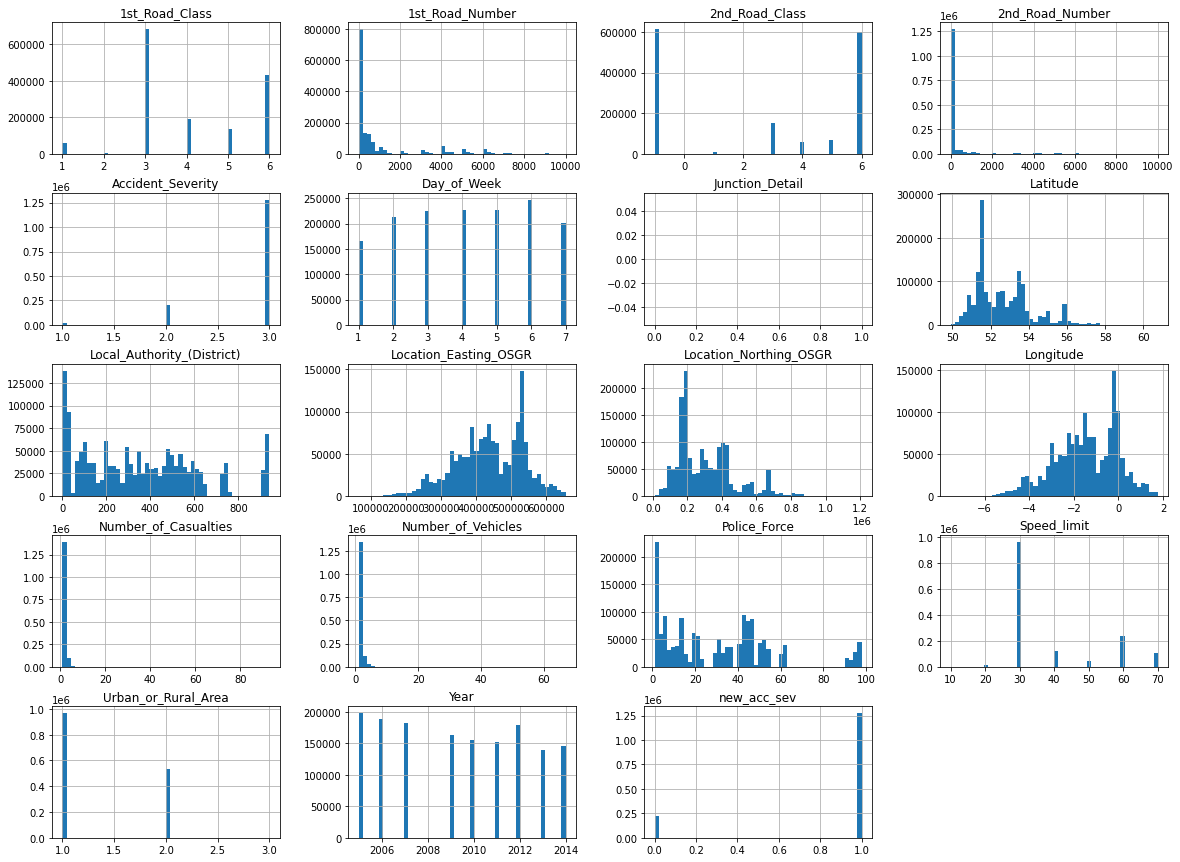

In [0]:
data.hist(bins=50, figsize=(20,15))
plt.show()

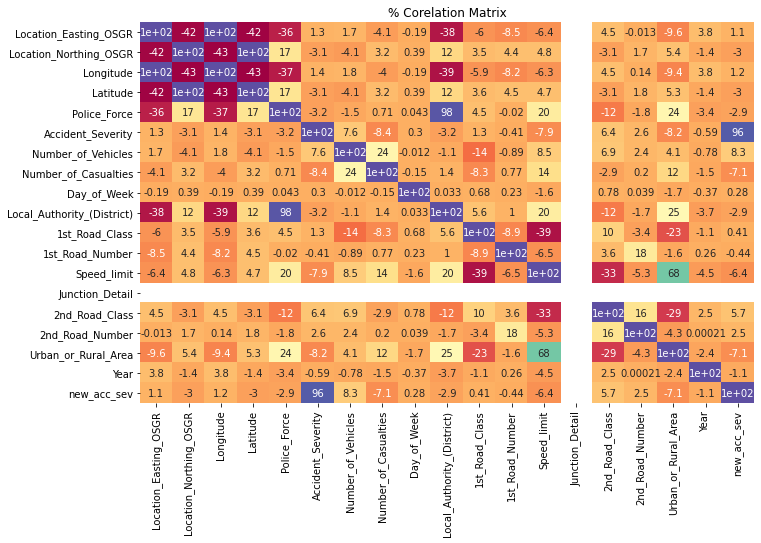

In [0]:
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=data.corr()*100,cmap='Spectral')
plt.title('% Corelation Matrix')
plt.show()

In [0]:
## We can see that Accident_Severity is highly correlated with numeber of Vehicles 

In [0]:
data.Accident_Severity.unique()

array([2, 3, 1])

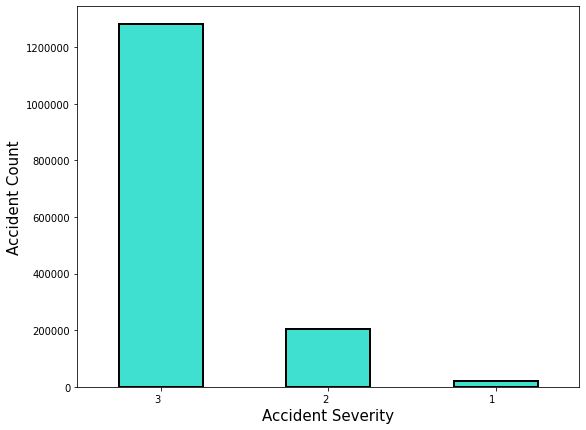

In [0]:
from matplotlib.ticker import ScalarFormatter
data.Accident_Severity.value_counts().plot(kind='bar',color='turquoise',figsize=(9,7),linewidth=2,edgecolor="k");
plt.ylabel('Accident Count',fontsize=15)
plt.xlabel('Accident Severity',fontsize=15)
plt.xticks(rotation=0, ha='right')
plt.ticklabel_format(axis='y', style='plain')

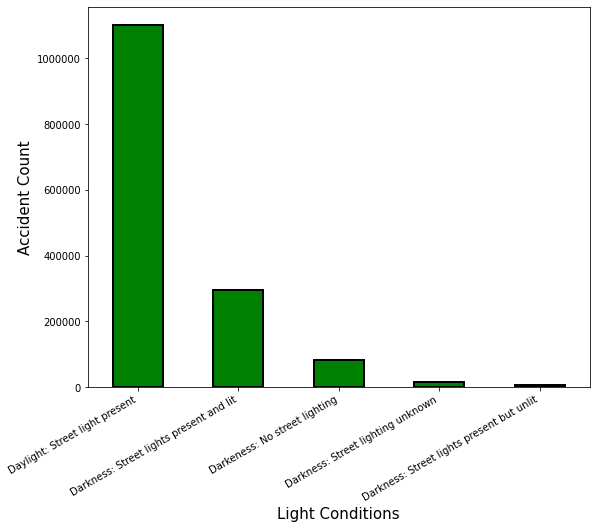

In [0]:
from matplotlib.ticker import ScalarFormatter
data.Light_Conditions.value_counts().plot(kind='bar',color='green',figsize=(9,7),linewidth=2,edgecolor="k");
plt.ylabel('Accident Count',fontsize=15)
plt.xlabel('Light Conditions',fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.ticklabel_format(axis='y', style='plain')

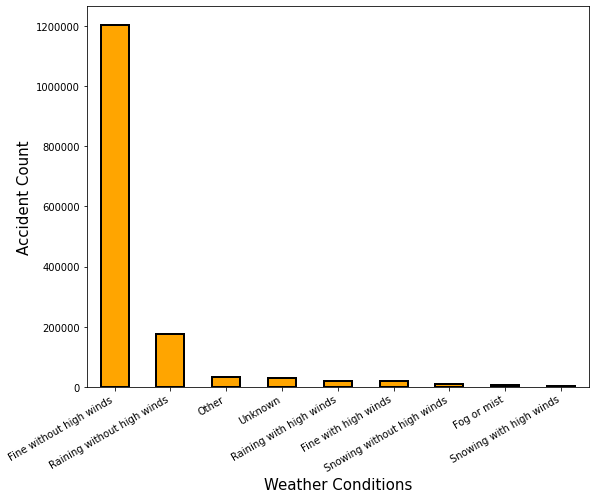

In [0]:
from matplotlib.ticker import ScalarFormatter
data.Weather_Conditions.value_counts().plot(kind='bar',color='orange',figsize=(9,7),linewidth=2,edgecolor="k");
plt.ylabel('Accident Count',fontsize=15)
plt.xlabel('Weather Conditions',fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.ticklabel_format(axis='y', style='plain')

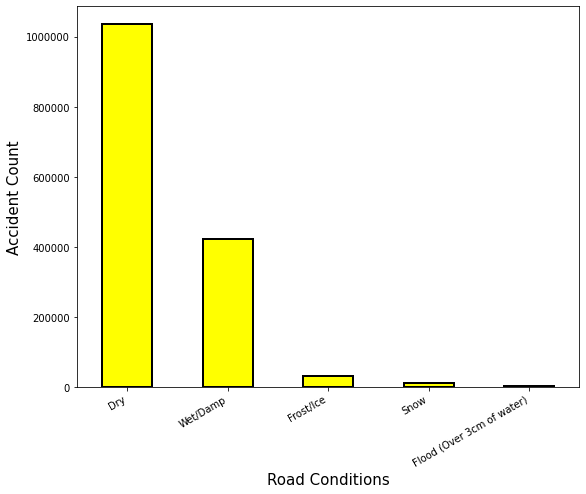

In [0]:
from matplotlib.ticker import ScalarFormatter
data.Road_Surface_Conditions.value_counts().plot(kind='bar',color='yellow',figsize=(9,7),linewidth=2,edgecolor="k");
plt.ylabel('Accident Count',fontsize=15)
plt.xlabel('Road Conditions',fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.ticklabel_format(axis='y', style='plain')

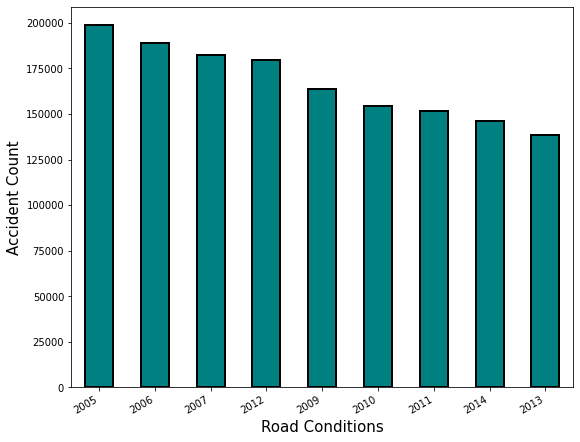

In [0]:
from matplotlib.ticker import ScalarFormatter
data.Year.value_counts().plot(kind='bar',color='teal',figsize=(9,7),linewidth=2,edgecolor="k");
plt.ylabel('Accident Count',fontsize=15)
plt.xlabel('Road Conditions',fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.ticklabel_format(axis='y', style='plain')

In [0]:
data.drop(['Junction_Detail', 'Junction_Control','LSOA_of_Accident_Location','Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','1st_Road_Number','2nd_Road_Number','Accident_Severity'] ,axis=1, inplace=True)

In [0]:
data.dropna(inplace=True)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499598 entries, 0 to 464696
Data columns (total 23 columns):
 #   Column                                       Non-Null Count    Dtype 
---  ------                                       --------------    ----- 
 0   Police_Force                                 1499598 non-null  int64 
 1   Number_of_Vehicles                           1499598 non-null  int64 
 2   Number_of_Casualties                         1499598 non-null  int64 
 3   Date                                         1499598 non-null  object
 4   Day_of_Week                                  1499598 non-null  int64 
 5   Time                                         1499598 non-null  object
 6   Local_Authority_(District)                   1499598 non-null  int64 
 7   Local_Authority_(Highway)                    1499598 non-null  object
 8   1st_Road_Class                               1499598 non-null  int64 
 9   Road_Type                                    1499598 non-n

In [0]:
# drop more columns that may not be useful
data.drop(['Police_Force','Local_Authority_(District)','Local_Authority_(Highway)'] ,axis=1, inplace=True)

In [0]:
# create 'time' and 'date' columns (extra columns)
# split the time:
data["time_modified"] = round(data["Time"].str.slice(0,2,1).astype(int) + (data["Time"].str.slice(3,5,1).astype(int))/60,2)
# data.head()


In [0]:
# split the date to base on the month

data["month_from_date"] = data["Date"].str.slice(0,2,1).astype(int)
data.head()

,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,new_acc_sev,time_modified,month_from_date
0,1,1,04/01/2005,3,17:42,3,Single carriageway,30,-1,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,0,17.70,4
1,1,1,05/01/2005,4,17:36,4,Dual carriageway,30,5,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,1,17.60,5
2,2,1,06/01/2005,5,00:15,5,Single carriageway,30,-1,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,1,0.25,6
3,1,1,07/01/2005,6,10:35,3,Single carriageway,30,-1,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,1,10.58,7
4,1,1,10/01/2005,2,21:13,6,Single carriageway,30,-1,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,1,21.22,10


In [0]:
# set up dummy variables
data = pd.get_dummies(data, columns=["1st_Road_Class","Road_Type","2nd_Road_Class","Pedestrian_Crossing-Human_Control","Pedestrian_Crossing-Physical_Facilities","Light_Conditions","Weather_Conditions","Road_Surface_Conditions","Special_Conditions_at_Site","Carriageway_Hazards","Urban_or_Rural_Area","Did_Police_Officer_Attend_Scene_of_Accident","month_from_date","Year","Day_of_Week"], drop_first=True)
data.head()

,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,new_acc_sev,time_modified,1st_Road_Class_2,1st_Road_Class_3,1st_Road_Class_4,1st_Road_Class_5,1st_Road_Class_6,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,2nd_Road_Class_1,2nd_Road_Class_2,2nd_Road_Class_3,2nd_Road_Class_4,2nd_Road_Class_5,2nd_Road_Class_6,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,...,month_from_date_6,month_from_date_7,month_from_date_8,month_from_date_9,month_from_date_10,month_from_date_11,month_from_date_12,month_from_date_13,month_from_date_14,month_from_date_15,month_from_date_16,month_from_date_17,month_from_date_18,month_from_date_19,month_from_date_20,month_from_date_21,month_from_date_22,month_from_date_23,month_from_date_24,month_from_date_25,month_from_date_26,month_from_date_27,month_from_date_28,month_from_date_29,month_from_date_30,month_from_date_31,Year_2006,Year_2007,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,Day_of_Week_7
0,1,1,04/01/2005,17:42,30,0,17.70,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,05/01/2005,17:36,30,1,17.60,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,1,06/01/2005,00:15,30,1,0.25,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1,07/01/2005,10:35,30,1,10.58,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,10/01/2005,21:13,30,1,21.22,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
data.columns

Index(['Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Time',
       'Speed_limit', 'new_acc_sev', 'time_modified', '1st_Road_Class_2',
       '1st_Road_Class_3', '1st_Road_Class_4',
       ...
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Day_of_Week_7'],
      dtype='object', length=105)

In [0]:
# drop more columns that may not be useful
data.drop(['Date','Time'] ,axis=1, inplace=True)

In [0]:
data.shape

(1499598, 103)

In [0]:
data.columns

Index(['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit',
       'new_acc_sev', 'time_modified', '1st_Road_Class_2', '1st_Road_Class_3',
       '1st_Road_Class_4', '1st_Road_Class_5', '1st_Road_Class_6',
       ...
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Day_of_Week_7'],
      dtype='object', length=103)

In [0]:
# normalization
# min_max normalization (priority)
X = data.iloc[:,1:5]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_values = scaler.fit_transform(X)
data.iloc[:,1:5] = rescaled_values
data.head()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit,new_acc_sev,time_modified,1st_Road_Class_2,1st_Road_Class_3,1st_Road_Class_4,1st_Road_Class_5,1st_Road_Class_6,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,2nd_Road_Class_1,2nd_Road_Class_2,2nd_Road_Class_3,2nd_Road_Class_4,2nd_Road_Class_5,2nd_Road_Class_6,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,...,month_from_date_6,month_from_date_7,month_from_date_8,month_from_date_9,month_from_date_10,month_from_date_11,month_from_date_12,month_from_date_13,month_from_date_14,month_from_date_15,month_from_date_16,month_from_date_17,month_from_date_18,month_from_date_19,month_from_date_20,month_from_date_21,month_from_date_22,month_from_date_23,month_from_date_24,month_from_date_25,month_from_date_26,month_from_date_27,month_from_date_28,month_from_date_29,month_from_date_30,month_from_date_31,Year_2006,Year_2007,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,Day_of_Week_7
0,1,0.0,0.333333,0.0,0.737896,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0.0,0.333333,1.0,0.733723,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,0.0,0.333333,1.0,0.009599,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0.0,0.333333,1.0,0.440735,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0.0,0.333333,1.0,0.884808,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
# shuffle the data to get rid of the 'year' trend

model_data = shuffle(data.iloc[:,:], random_state=123).reset_index(drop=True)
model_data.head()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit,new_acc_sev,time_modified,1st_Road_Class_2,1st_Road_Class_3,1st_Road_Class_4,1st_Road_Class_5,1st_Road_Class_6,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,2nd_Road_Class_1,2nd_Road_Class_2,2nd_Road_Class_3,2nd_Road_Class_4,2nd_Road_Class_5,2nd_Road_Class_6,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,...,month_from_date_6,month_from_date_7,month_from_date_8,month_from_date_9,month_from_date_10,month_from_date_11,month_from_date_12,month_from_date_13,month_from_date_14,month_from_date_15,month_from_date_16,month_from_date_17,month_from_date_18,month_from_date_19,month_from_date_20,month_from_date_21,month_from_date_22,month_from_date_23,month_from_date_24,month_from_date_25,month_from_date_26,month_from_date_27,month_from_date_28,month_from_date_29,month_from_date_30,month_from_date_31,Year_2006,Year_2007,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,Day_of_Week_7
0,2,0.032609,0.333333,1.0,0.409432,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,0.000000,0.333333,0.0,0.608514,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0.000000,0.500000,1.0,0.792154,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,2,0.000000,0.333333,1.0,0.767947,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2,0.000000,0.333333,0.0,0.502922,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Data Modelling


In [0]:
x = model_data.drop(["new_acc_sev"], axis=1)
y = model_data["new_acc_sev"]


x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2,stratify=y, random_state= 525)
print(x_train.shape)
print(x_validation.shape)

(1199678, 102)
(299920, 102)


In [0]:
print(y_train.shape)
print(y_validation.shape)

(1199678,)
(299920,)


In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)

print(train_labels)

print(train_labels.shape)

validation_labels = to_categorical(y_validation)
print(validation_labels)
print(validation_labels.shape)


[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(1199678, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
(299920, 2)


In [0]:
# this is for checking if label encoding is working or not based on validation data
print(y_validation)
print(validation_labels)

1235158    1.0
69441      1.0
1407311    1.0
639113     0.0
426498     1.0
          ... 
1096529    0.0
682594     0.0
381389     1.0
1467612    0.0
815036     1.0
Name: new_acc_sev, Length: 299920, dtype: float64
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [0]:
# this is for checking if label encoding is working or not based on train data
print(y_train)
print(train_labels)

1333716    1.0
94941      0.0
832704     1.0
160049     1.0
1355185    1.0
          ... 
848642     1.0
429991     1.0
1027086    1.0
159177     1.0
44525      1.0
Name: new_acc_sev, Length: 1199678, dtype: float64
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
# this is for checking the frequency of 'severity' i.e., targets in our train and validation data
## Here we can see that Dataset is highly Imbalanced almost in proportion of 0:1-1:10
np.unique(y_train, return_counts=True)


(array([0., 1.]), array([ 178840, 1020838]))

In [0]:
np.unique(y_validation, return_counts=True)

(array([0., 1.]), array([ 44710, 255210]))

In [0]:
Low_Severity = data['new_acc_sev'].value_counts()[0]
High_Severity= data['new_acc_sev'].value_counts()[1]

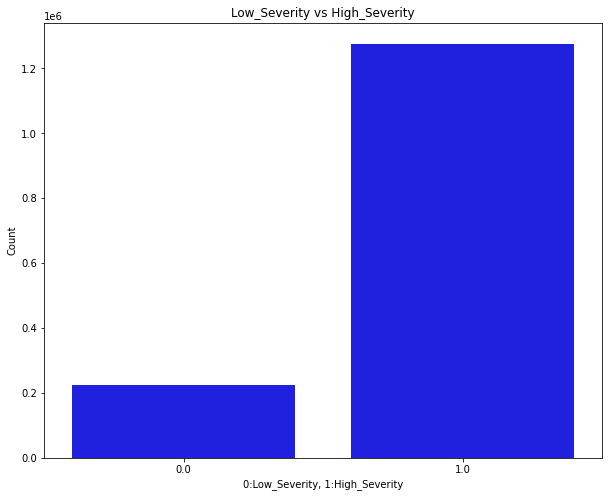

In [0]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['new_acc_sev'].value_counts().index,y=data['new_acc_sev'].value_counts(),color='blue')
plt.title('Low_Severity vs High_Severity')
plt.ylabel('Count')
plt.xlabel('0:Low_Severity, 1:High_Severity');

In [0]:
## Using Random Over_sampling Technique to Balance our dataset
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler(sampling_strategy='minority')
x_train_new,y_train_new=over.fit_sample(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
## Now you can see after using Oversampling technique ratio of 0:1 is 1:1 which improves our predictions
print(x_train_new.shape)
print(y_train_new.shape)
print(x_train.shape)
np.unique(y_train_new, return_counts=True)

(2041676, 102)
(2041676,)
(1199678, 102)


(array([0., 1.]), array([1020838, 1020838]))

In [0]:
train_labels_1=to_categorical(y_train_new)

Basic Dense Neural Network_Model-1 with Dropout

In [0]:
Model = Sequential()
Model.add(Dense(256,
                  activation='relu',
                  input_dim=102))
Model.add(Dropout(0.3))
Model.add(Dense(128, activation='relu'))
Model.add(Dropout(0.4))
Model.add(Dense(64,activation='relu'))
Model.add(Dense(32,activation='relu'))
Model.add(Dense(16, activation='relu'))
Model.add(Dense(8,activation='relu'))
Model.add(Dense(2,activation='softmax'))

In [0]:
from sklearn.metrics import log_loss

In [0]:
Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# validation changes made are here

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=4, 
                   verbose=1)

In [0]:
history = Model.fit(x_train_new, train_labels_1, 
                      validation_data=(x_validation, validation_labels),
                      epochs=10, batch_size=100, 
                      verbose=1, class_weight ="balanced", callbacks=[es]) 

Train on 2041676 samples, validate on 299920 samples
Epoch 1/10
2041676/2041676 [==============================] - 133s 65us/step - loss: 0.6468 - accuracy: 0.6269 - val_loss: 0.6401 - val_accuracy: 0.6646
Epoch 2/10
2041676/2041676 [==============================] - 132s 64us/step - loss: 0.6410 - accuracy: 0.6331 - val_loss: 0.6365 - val_accuracy: 0.6477
Epoch 3/10
2041676/2041676 [==============================] - 133s 65us/step - loss: 0.6384 - accuracy: 0.6351 - val_loss: 0.6250 - val_accuracy: 0.6705
Epoch 4/10
2041676/2041676 [==============================] - 131s 64us/step - loss: 0.6367 - accuracy: 0.6362 - val_loss: 0.6206 - val_accuracy: 0.6662
Epoch 5/10
2041676/2041676 [==============================] - 134s 65us/step - loss: 0.6350 - accuracy: 0.6377 - val_loss: 0.6330 - val_accuracy: 0.6441
Epoch 6/10
2041676/2041676 [==============================] - 132s 64us/step - loss: 0.6334 - accuracy: 0.6388 - val_loss: 0.6391 - val_accuracy: 0.6572
Epoch 7/10
2041676/2041676 [=

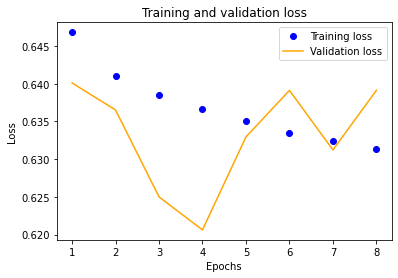

In [0]:
history_dict = history.history
Second_loss_values = history_dict['loss']
Second_val_loss_values = history_dict['val_loss'] 
Second_epochs = range(1, len(Second_loss_values) + 1)
plt.plot(Second_epochs, Second_loss_values, 'bo', label='Training loss')
plt.plot(Second_epochs, Second_val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import classification_report

In [0]:
model_1_val_y = Model.predict_classes(x_validation)
model_1_train_x = Model.predict_classes(x_train_new)

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_new,model_1_train_x))

[[659429 361409]
 [359727 661111]]


In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_validation, model_1_val_y))

[[ 27773  16937]
 [ 90406 164804]]


In [0]:
from sklearn.metrics import accuracy_score
validation_score = accuracy_score(y_validation, model_1_val_y)
print("Model 1 Test Accuracy Score = ", validation_score)

Model 1 Test Accuracy Score =  0.6420945585489464


In [0]:
target_names = ['0','1']
print(classification_report(y_validation, model_1_val_y, target_names=target_names))

              precision    recall  f1-score   support

           0       0.24      0.62      0.34     44710
           1       0.91      0.65      0.75    255210

    accuracy                           0.64    299920
   macro avg       0.57      0.63      0.55    299920
weighted avg       0.81      0.64      0.69    299920



Dense Neural Network with improved architecture and Dropout

In [0]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
 


Model-2 with improved architecture hidden layers-7, with Dropout

In [0]:
    model_2 = tf.keras.Sequential()
    model_2.add(tf.keras.layers.Dense(1024, input_dim=102, activation='relu'))
    model_2.add(tf.keras.layers.Dropout(0.3))
    model_2.add(tf.keras.layers.Dense(512, activation='relu'))
    model_2.add(tf.keras.layers.Dropout(0.2))
    model_2.add(tf.keras.layers.Dense(256, activation='relu'))
    model_2.add(tf.keras.layers.Dropout(0.3))
    model_2.add(tf.keras.layers.Dense(128, activation='relu'))
    model_2.add(tf.keras.layers.Dropout(0.2))
    model_2.add(tf.keras.layers.Dense(64, activation='relu'))
    model_2.add(tf.keras.layers.Dropout(0.3))
    model_2.add(tf.keras.layers.Dense(32, activation='relu'))
    model_2.add(tf.keras.layers.Dense(16,activation='relu'))
    model_2.add(tf.keras.layers.Dropout(0.2))
    model_2.add(tf.keras.layers.Dense(8, activation='relu'))
    #model.add(tf.keras.layers.Dropout(0.2))
    #model.add(tf.keras.layers.SimpleRNN(32))
    model_2.add(tf.keras.layers.Dense(2, activation='softmax'))


In [0]:
from sklearn.metrics import log_loss

In [0]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=4, 
                   verbose=1)

In [0]:
history1 = model_2.fit(x_train_new, train_labels_1,
                       validatio_data=(x_validation,y_validation),
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)
                   
            

Epoch 1/5
51042/51042 [==============================] - 305s 6ms/step - loss: 0.6188 - accuracy: 0.6560 - val_loss: 0.9112 - val_accuracy: 0.1898
Epoch 2/5
51042/51042 [==============================] - 304s 6ms/step - loss: 0.6198 - accuracy: 0.6537 - val_loss: 0.8436 - val_accuracy: 0.3065
Epoch 3/5
51042/51042 [==============================] - 305s 6ms/step - loss: 0.6212 - accuracy: 0.6506 - val_loss: 0.7665 - val_accuracy: 0.4761
Epoch 4/5
51042/51042 [==============================] - 307s 6ms/step - loss: 0.6235 - accuracy: 0.6471 - val_loss: 0.8092 - val_accuracy: 0.5499
Epoch 5/5
51042/51042 [==============================] - 306s 6ms/step - loss: 0.6234 - accuracy: 0.6477 - val_loss: 0.9422 - val_accuracy: 0.4259


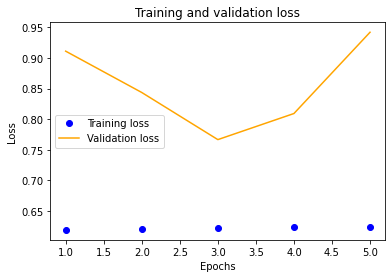

In [0]:
history_dict = history1.history
Second_loss_values = history_dict['loss']
Second_val_loss_values = history_dict['val_loss'] 
Second_epochs = range(1, len(Second_loss_values) + 1)
plt.plot(Second_epochs, Second_loss_values, 'bo', label='Training loss')
plt.plot(Second_epochs, Second_val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:

model_2_val = model_2.predict_classes(x_validation)
model_2_train = model_2.predict_classes(x_train_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_new,model_2_train))

[[216648 804190]
 [ 78688 942150]]


In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_validation, model_2_val))

[[  9314  35396]
 [ 19867 235343]]


In [0]:
from sklearn.metrics import accuracy_score
validation_score = accuracy_score(y_validation, model_2_val)
print("Model 2 Test Accuracy Score = ", validation_score)

Model 2 Test Accuracy Score =  0.8157408642304614


In [0]:
target_names = ['0','1']
print(classification_report(y_validation, model_2_val, target_names=target_names))

              precision    recall  f1-score   support

           0       0.32      0.21      0.25     44710
           1       0.87      0.92      0.89    255210

    accuracy                           0.82    299920
   macro avg       0.59      0.57      0.57    299920
weighted avg       0.79      0.82      0.80    299920



#### Model_3 with improved architecture ,hidden layers-9, more nodes and without Dropout

In [0]:
    model_3 = tf.keras.Sequential()in
    model_3.add(tf.keras.layers.Dense(4096,input_dim=102,activation='relu'))
    model_3.add(tf.keras.layers.Dense(2048, activation='relu'))
    model_3.add(tf.keras.layers.Dense(1024, activation='relu'))
    model_3.add(tf.keras.layers.Dense(512, activation='relu'))
    model_3.add(tf.keras.layers.Dense(256, activation='relu'))
    model_3.add(tf.keras.layers.Dense(128, activation='relu'))
    model_3.add(tf.keras.layers.Dense(64, activation='relu'))
    model_3.add(tf.keras.layers.Dense(32, activation='relu'))
    model_3.add(tf.keras.layers.Dense(16, activation='relu'))
    model_3.add(tf.keras.layers.Dense(8, activation='relu'))
    model_3.add(tf.keras.layers.Dense(2, activation='softmax'))

In [0]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history2= model_3.fit(x_train_new, train_labels_1,
                       validatio_data=(x_validation,y_validation),
                    epochs=5,
                    batch_size=50,
                    validation_split=0.2)

Epoch 1/5
32667/32667 [==============================] - 356s 11ms/step - loss: 0.6181 - accuracy: 0.6549 - val_loss: 0.8233 - val_accuracy: 0.4926
Epoch 2/5
32667/32667 [==============================] - 356s 11ms/step - loss: 0.6119 - accuracy: 0.6615 - val_loss: 0.9983 - val_accuracy: 0.2936
Epoch 3/5
32667/32667 [==============================] - 355s 11ms/step - loss: 0.6068 - accuracy: 0.6655 - val_loss: 0.8984 - val_accuracy: 0.3814
Epoch 4/5
32667/32667 [==============================] - 356s 11ms/step - loss: 0.5988 - accuracy: 0.6715 - val_loss: 0.9666 - val_accuracy: 0.3443
Epoch 5/5
32667/32667 [==============================] - 356s 11ms/step - loss: 0.5843 - accuracy: 0.6830 - val_loss: 0.8253 - val_accuracy: 0.4503


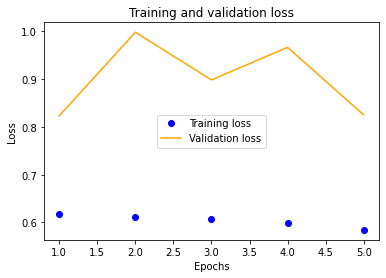

In [0]:
history_dict = history2.history
Second_loss_values = history_dict['loss']
Second_val_loss_values = history_dict['val_loss'] 
Second_epochs = range(1, len(Second_loss_values) + 1)
plt.plot(Second_epochs, Second_loss_values, 'bo', label='Training loss')
plt.plot(Second_epochs, Second_val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:

model_3_val = model_3.predict_classes(x_validation)
model_3_train = model_3.predict_classes(x_train_new)

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_new,model_3_train))

[[468530 552308]
 [170162 850676]]


In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_validation, model_3_val))

[[ 16807  27903]
 [ 45564 209646]]


In [0]:
from sklearn.metrics import accuracy_score
validation_score = accuracy_score(y_validation, model_3_val)
print("Model 3 Test Accuracy Score = ", validation_score)

Model 3 Test Accuracy Score =  0.7550446785809549


In [0]:
target_names = ['0','1']
print(classification_report(y_validation, model_3_val, target_names=target_names))

              precision    recall  f1-score   support

           0       0.27      0.38      0.31     44710
           1       0.88      0.82      0.85    255210

    accuracy                           0.76    299920
   macro avg       0.58      0.60      0.58    299920
weighted avg       0.79      0.76      0.77    299920



Model_4 with improved architecture ,hidden layers-9, more nodes and with Dropout

In [0]:
    model_4 = tf.keras.Sequential()
    model_4.add(tf.keras.layers.Dense(4096,input_dim=102,activation='relu'))
    model_4.add(tf.keras.layers.Dense(2048, activation='relu'))
    model_4.add(tf.keras.layers.Dropout(0.2))
    model_4.add(tf.keras.layers.Dense(1024, activation='relu'))
    model_4.add(tf.keras.layers.Dropout(0.2))
    model_4.add(tf.keras.layers.Dense(512, activation='relu'))
    model_4.add(tf.keras.layers.Dropout(0.2))
    model_4.add(tf.keras.layers.Dense(256, activation='relu'))
    model_4.add(tf.keras.layers.Dropout(0.2))
    model_4.add(tf.keras.layers.Dense(128, activation='relu'))
    model_4.add(tf.keras.layers.Dropout(0.2))
    model_4.add(tf.keras.layers.Dense(64, activation='relu'))
    model_4.add(tf.keras.layers.Dropout(0.2))
    model_4.add(tf.keras.layers.Dense(32, activation='relu'))
    model_4.add(tf.keras.layers.Dropout(0.2))
    model_4.add(tf.keras.layers.Dense(16, activation='relu'))
    model_4.add(tf.keras.layers.Dropout(0.2))
    model_4.add(tf.keras.layers.Dense(8, activation='relu'))
    model_4.add(tf.keras.layers.Dense(2, activation='softmax'))

In [0]:
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history3= model_4.fit(x_train_new, train_labels_1,
                       validatio_data=(x_validation,y_validation),
                    epochs=5,
                    batch_size=50,
                    validation_split=0.2)

Epoch 1/5
32667/32667 [==============================] - 383s 12ms/step - loss: 0.6233 - accuracy: 0.6486 - val_loss: 0.9353 - val_accuracy: 0.3005
Epoch 2/5
32667/32667 [==============================] - 384s 12ms/step - loss: 0.6165 - accuracy: 0.6581 - val_loss: 0.9366 - val_accuracy: 0.3790
Epoch 3/5
32667/32667 [==============================] - 384s 12ms/step - loss: 0.6155 - accuracy: 0.6596 - val_loss: 0.8835 - val_accuracy: 0.4589
Epoch 4/5
32667/32667 [==============================] - 382s 12ms/step - loss: 0.6166 - accuracy: 0.6576 - val_loss: 0.8470 - val_accuracy: 0.6436
Epoch 5/5
32667/32667 [==============================] - 383s 12ms/step - loss: 0.6320 - accuracy: 0.6359 - val_loss: 0.8826 - val_accuracy: 0.1204


In [0]:
model_4_val = model_4.predict_classes(x_validation)
model_4_train = model_4.predict_classes(x_train_new)

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_new,model_4_train))

[[123055 897783]
 [ 52581 968257]]


In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_validation, model_4_val))

[[  5343  39367]
 [ 13352 241858]]


In [0]:
from sklearn.metrics import accuracy_score
validation_score = accuracy_score(y_validation, model_4_val)
print("Model 4 Test Accuracy Score = ", validation_score)

Model 4 Test Accuracy Score =  0.8242231261669779


In [0]:
target_names = ['0','1']
print(classification_report(y_validation, model_4_val, target_names=target_names))

              precision    recall  f1-score   support

           0       0.29      0.12      0.17     44710
           1       0.86      0.95      0.90    255210

    accuracy                           0.82    299920
   macro avg       0.57      0.53      0.54    299920
weighted avg       0.77      0.82      0.79    299920



In [0]:
## 4 Dense neural network models were developed and we found Model-2 to be better in terms of both f-1 score of 0 and 1 and overall Accuracy